In [2]:
%matplotlib notebook
import numpy
import matplotlib.pyplot as plt

size(t9): 16385
size(t10): 16385


<IPython.core.display.Javascript object>


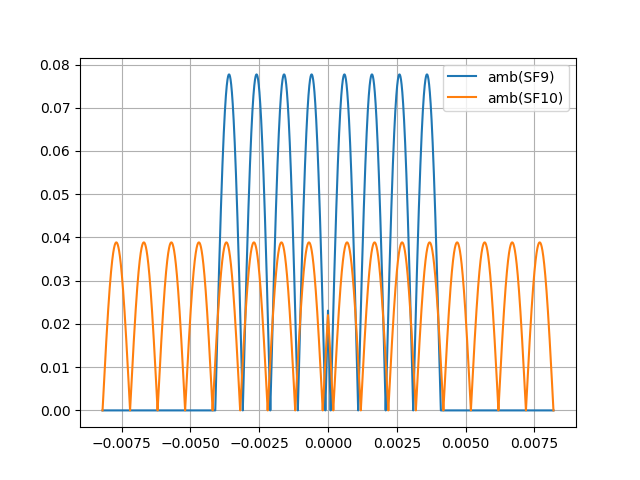

In [3]:
def loraSymboltime(bw, sf):
    return (2**sf)/bw

def ambiguityPulse(t, Fd, tau, beta):
    # note: only valid for t in [-tau, tau]
    result = np.zeros(t.shape)
    mask = (np.abs(t) <= tau)  # only update the elements where t is non zero
    sabs = np.abs(t[mask])/tau
    result[mask] = np.multiply((1 - sabs), np.abs(np.sinc(Fd*tau*(1-sabs))))
    return result

Tsym9 = loraSymboltime(125e3, 9)
Tsym10 = loraSymboltime(125e3, 10)

Ts = 1e-6  # sampling interval
t9 = np.arange(-Tsym10, Tsym10+Ts, Ts)
print("size(t9):", t9.size)
t10 = np.arange(-Tsym10, Tsym10+Ts, Ts)
print("size(t10):", t10.size)

A9 = ambiguityPulse(t9, 1e3, Tsym9, 125e3)
A10 = ambiguityPulse(t10, 1e3, Tsym10, 125e3)

plt.figure()
plt.plot(t9, A9, 'C0-', label="amb(SF9)")
plt.plot(t10, A10, 'C1-', label="amb(SF10)")
plt.grid()
plt.legend()

# plt.figure()
# plt.plot(t9, A9.imag, 'C0-', label="imag(amb(SF9))")
# plt.plot(t10, A10.imag, 'C1-', label="imag(amb(SF10))")
# plt.grid()
# plt.legend()

plt.show()

<IPython.core.display.Javascript object>


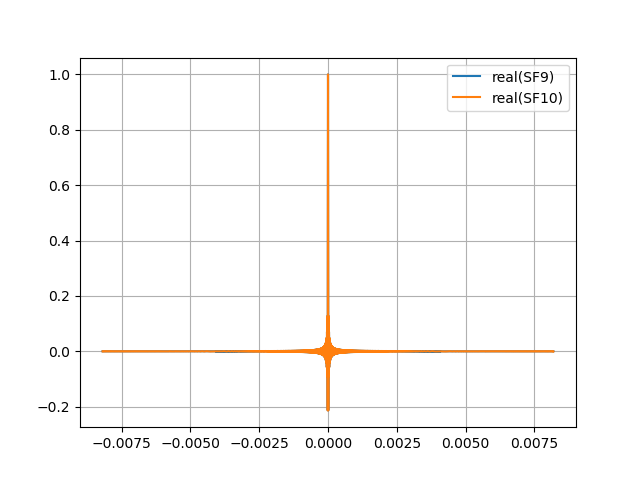

<IPython.core.display.Javascript object>


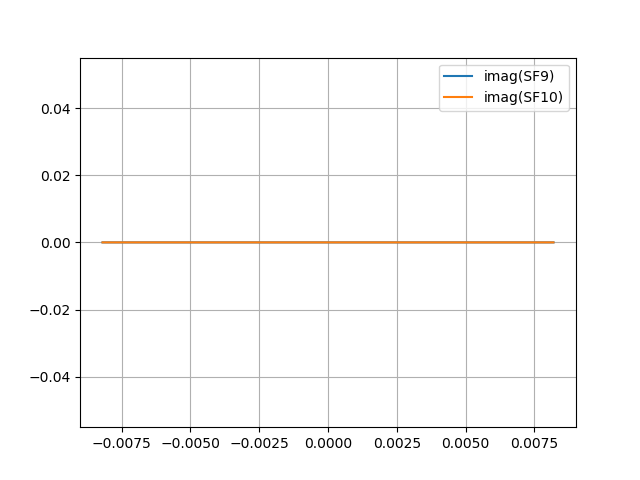

<IPython.core.display.Javascript object>


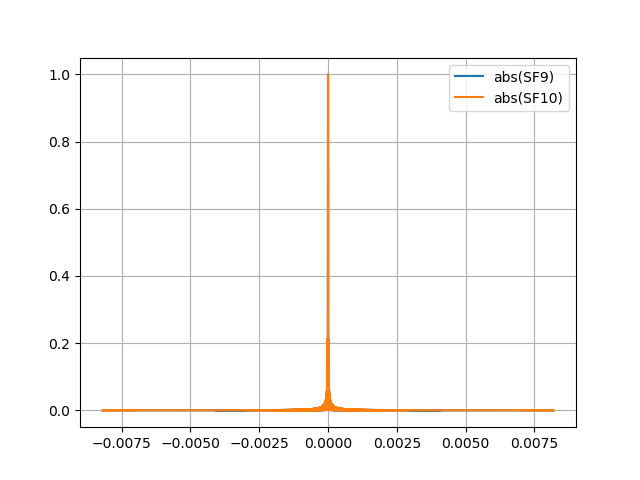

In [5]:
def ambiguityLFMComp(t, Fd, tau, bw):
    x = np.zeros(t.shape, dtype=np.complex)
    mask = (np.abs(t) <= tau)
    
    def Ahat(t):
        tr = 1 - np.abs(t)/tau
        e = np.exp(1j*np.pi*Fd*t)
        return np.multiply(e, np.multiply(tr, np.sinc(np.multiply((Fd + bw*t), tr))))
    
    x[mask] = Ahat(t[mask])
    return x

Tsym9 = loraSymboltime(125e3, 9)
Tsym10 = loraSymboltime(125e3, 10)

Ts = 1e-6  # sampling interval
t9 = np.arange(-Tsym10, Tsym10+Ts, Ts)
t10 = np.arange(-Tsym10, Tsym10+Ts, Ts)

A9lfm = ambiguityLFMComp(t10, 0, Tsym9, 125e3)
A10lfm = ambiguityLFMComp(t10, 0, Tsym10, 125e3)

plt.figure()
plt.plot(t10, A9lfm.real, 'C0-', label="real(SF9)")
plt.plot(t10, A10lfm.real, 'C1-', label="real(SF10)")
plt.grid()
plt.legend()

plt.figure()
plt.plot(t10, A9lfm.imag, 'C0-', label="imag(SF9)")
plt.plot(t10, A10lfm.imag, 'C1-', label="imag(SF10)")
plt.grid()
plt.legend()

plt.figure()
plt.plot(t10, np.abs(A9lfm), 'C0-', label="abs(SF9)")
plt.plot(t10, np.abs(A10lfm), 'C1-', label="abs(SF10)")
plt.grid()
plt.legend()

plt.show()

In [13]:
x = np.array([2, 3])
y = np.array([2, 3])
z = np.array([2, 3])

s = np.multiply(x,y,z)
print(s)

[4 9]
